In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scanpy as sc
import squidpy as sq
from muon import atac as ac
import pandas as pd

In [2]:
in_dir = "../../SpatialATAC/ProcessedData/AnnData/Enric_NBT_2023"
out_dir = '../../results/09_spatial_atac/02_clustering_all_peaks'

In [3]:
os.makedirs(out_dir, exist_ok=True)

In [4]:
dataset_list = ['E12_5_rep1', 'E12_5_rep2', 'E13_5_rep2', 'E15_5_rep1', 'E15_5_rep2']

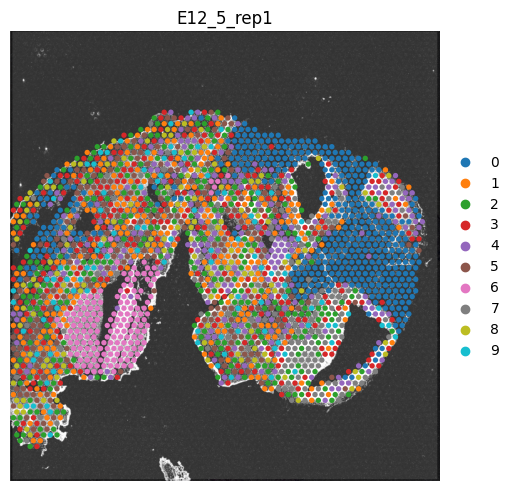

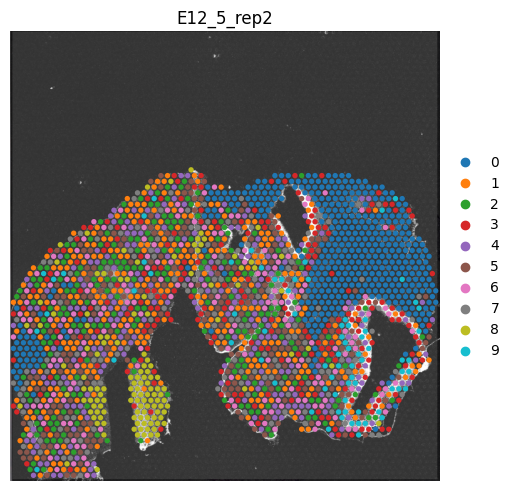

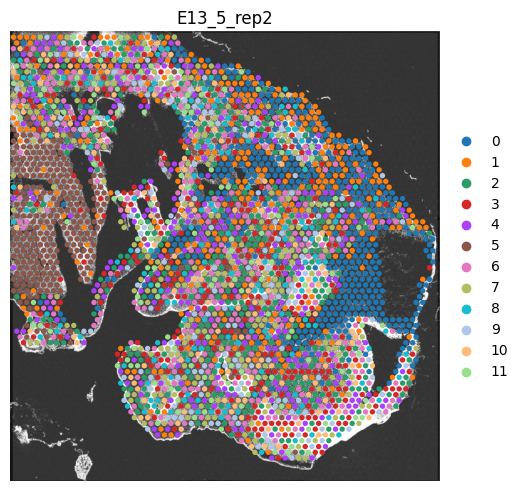

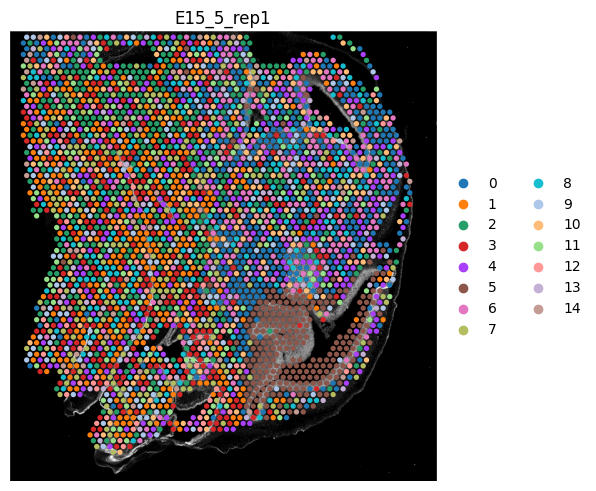

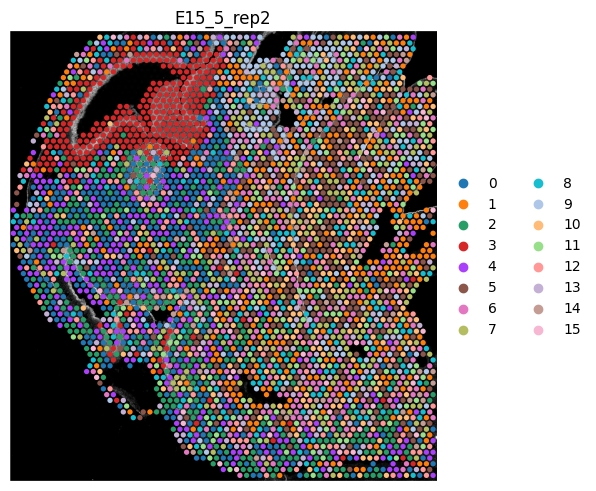

In [6]:
for dataset in dataset_list:
    adata = sc.read_h5ad(f"{in_dir}/{dataset}.h5ad")
    adata.X = adata.layers['counts'].copy()
    
    ac.preproc.tfidf(adata)
    ac.tools.lsi(adata)
    sc.pp.neighbors(adata, use_rep="X_lsi", n_pcs=30)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    
    adata.write_h5ad(f'{out_dir}/{dataset}.h5ad')
    adata.obs.to_csv(f'{out_dir}/{dataset}.csv')
    sq.pl.spatial_scatter(adata, color='leiden', frameon=False, title=dataset, img_res_key='lowres', size=20)